## Classificação de Websites

In [1]:
#import das bibliotecas 


import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

In [2]:
dataset=pd.read_csv('website_classification.csv')
dataset.shape

(1408, 4)

In [3]:
dataset.head()

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [4]:
df = dataset[['website_url','cleaned_website_text','Category']].copy()
df.head()

,website_url,cleaned_website_text,Category
0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [5]:
# Dropping duplicate entries

df = df.drop_duplicates(subset='website_url').reset_index(drop=True)
df.shape

(1384, 3)

In [6]:
pd.DataFrame(df.Category.unique()).values

array([['Travel'],
       ['Social Networking and Messaging'],
       ['News'],
       ['Streaming Services'],
       ['Sports'],
       ['Photography'],
       ['Law and Government'],
       ['Health and Fitness'],
       ['Games'],
       ['E-Commerce'],
       ['Forums'],
       ['Food'],
       ['Education'],
       ['Computers and Technology'],
       ['Business/Corporate'],
       ['Adult']], dtype=object)

*Crie uma nova coluna 'category_id' com categorias codificadas

In [7]:
df['category_id'] = df['Category'].factorize()[0]
category_id_df = df[['Category', 'category_id']].drop_duplicates()

*Dicionários para uso futuro

In [8]:
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)

*Visualização TF DF

In [9]:
category_id_df

,Category,category_id
0,Travel,0
36,Social Networking and Messaging,1
43,News,2
107,Streaming Services,3
212,Sports,4
390,Photography,5
575,Law and Government,6
658,Health and Fitness,7
748,Games,8
790,E-Commerce,9


## Visualização dos Dados

In [10]:
# from wordcloud import WordCloud,STOPWORDS
# plt.figure(figsize=(40,25))
# subset = df[df['Category']=='Travel']
# text = subset.cleaned_website_text.values
# cloud1=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
#                        ).generate(" ".join(text))
# plt.subplot(4,4,1)
# plt.axis('off')
# plt.title("Travel",fontsize=40)
# plt.imshow(cloud1)
# subset = df[df['Category']=='Social Networking and Messaging']
# text = subset.cleaned_website_text.values
# cloud2=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
#                        ).generate(" ".join(text))
# plt.subplot(4,4,2)
# plt.axis('off')
# plt.title("Social Networking and Messaging",fontsize=40)
# plt.imshow(cloud2)
# subset = df[df['Category']=='News']
# text = subset.cleaned_website_text.values
# cloud3=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
#                        ).generate(" ".join(text))
# plt.subplot(4,4,3)
# plt.axis('off')
# plt.title("News",fontsize=40)
# plt.imshow(cloud3)

# subset = df[df['Category']=='Streaming Services']
# text = subset.cleaned_website_text.values
# cloud4=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
#                        ).generate(" ".join(text))
# plt.subplot(4,4,4)
# plt.axis('off')
# plt.title("Streaming Services",fontsize=40)
# plt.imshow(cloud4)

# subset = df[df['Category']=='Sports']
# text = subset.cleaned_website_text.values
# cloud5=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
#                        ).generate(" ".join(text))
# plt.subplot(4,4,5)
# plt.axis('off')
# plt.title('Sports',fontsize=40)
# plt.imshow(cloud5)

# subset = df[df['Category']=='Photography']
# text = subset.cleaned_website_text.values
# cloud6=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
#                        ).generate(" ".join(text))
# plt.subplot(4,4,6)
# plt.axis('off')
# plt.title("Photography",fontsize=40)
# plt.imshow(cloud6)

# subset = df[df['Category']=='Law and Government']
# text = subset.cleaned_website_text.values
# cloud7=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
#                        ).generate(" ".join(text))
# plt.subplot(4,4,7)
# plt.axis('off')
# plt.title("Law and Government",fontsize=40)
# plt.imshow(cloud7)

# subset = df[df['Category']=='Health and Fitness']
# text = subset.cleaned_website_text.values
# cloud8=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
#                        ).generate(" ".join(text))
# plt.subplot(4,4,8)
# plt.axis('off')
# plt.title("Health and Fitness",fontsize=40)
# plt.imshow(cloud8)

# subset = df[df['Category']=='Games']
# text = subset.cleaned_website_text.values
# cloud9=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
#                        ).generate(" ".join(text))
# plt.subplot(4,4,9)
# plt.axis('off')
# plt.title("Games",fontsize=40)
# plt.imshow(cloud9)

# subset = df[df['Category']=='E-Commerce']
# text = subset.cleaned_website_text.values
# cloud10=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
#                        ).generate(" ".join(text))
# plt.subplot(4,4,10)
# plt.axis('off')
# plt.title("E-Commerce",fontsize=40)
# plt.imshow(cloud10)

# subset = df[df['Category']=='Forums']
# text = subset.cleaned_website_text.values
# cloud11=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
#                        ).generate(" ".join(text))
# plt.subplot(4,4,11)
# plt.axis('off')
# plt.title("Forums",fontsize=40)
# plt.imshow(cloud11)

# subset = df[df['Category']=='Food']
# text = subset.cleaned_website_text.values
# cloud12=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
#                        ).generate(" ".join(text))
# plt.subplot(4,4,12)
# plt.axis('off')
# plt.title("Food",fontsize=40)
# plt.imshow(cloud12)

# subset = df[df['Category']=='Education']
# text = subset.cleaned_website_text.values
# cloud13=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
#                        ).generate(" ".join(text))
# plt.subplot(4,4,13)
# plt.axis('off')
# plt.title("Education",fontsize=40)
# plt.imshow(cloud13)

# subset =df[df['Category']=='Computers and Technology']
# text = subset.cleaned_website_text.values
# cloud14=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
#                        ).generate(" ".join(text))
# plt.subplot(4,4,14)
# plt.axis('off')
# plt.title("Computers and Technology",fontsize=40)
# plt.imshow(cloud14)

# subset = df[df['Category']=='Business/Corporate']
# text = subset.cleaned_website_text.values
# cloud15=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
#                        ).generate(" ".join(text))
# plt.subplot(4,4,15)
# plt.axis('off')
# plt.title("Business/Corporate",fontsize=40)
# plt.imshow(cloud15)

# subset = df[df['Category']=='Adult']
# text = subset.cleaned_website_text.values
# cloud16=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
#                        ).generate(" ".join(text))
# plt.subplot(4,4,16)
# plt.axis('off')
# plt.title("Adult",fontsize=40)
# plt.imshow(cloud16)
# plt.show()

# Aplicação do TF-IDF

In [11]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

features = tfidf.fit_transform(df.cleaned_website_text).toarray()

labels = df.category_id
print("Cada texto %d é representado por %d recursos (pontuação TF-IDF de unigramas e bigramas)" %(features.shape))

Cada texto 1384 é representado por 18212 recursos (pontuação TF-IDF de unigramas e bigramas)


* Encontrando os três termos mais correlacionados com cada uma das categorias

In [12]:
N = 3
for Category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("\n==> %s:" %(Category))
  print("  * A maioria dos Unigramas Correlacionados são: %s" %(', '.join(unigrams[-N:])))
  print("  * A maioria dos Bigrams Correlacionados são: %s" %(', '.join(bigrams[-N:])))


==> Adult:
  * A maioria dos Unigramas Correlacionados são: porn, xxx, erotic
  * A maioria dos Bigrams Correlacionados são: sex toys, sex toy, erotic story

==> Business/Corporate:
  * A maioria dos Unigramas Correlacionados são: accounting, investment, banking
  * A maioria dos Bigrams Correlacionados são: home products, real estate, online banking

==> Computers and Technology:
  * A maioria dos Unigramas Correlacionados são: file, windows, software
  * A maioria dos Bigrams Correlacionados são: visual basic, web hosting, source code

==> E-Commerce:
  * A maioria dos Unigramas Correlacionados são: accessory, accessories, shipping
  * A maioria dos Bigrams Correlacionados são: grocery shopping, add cart, free shipping

==> Education:
  * A maioria dos Unigramas Correlacionados são: biology, university, chemistry
  * A maioria dos Bigrams Correlacionados são: earth science, periodic table, open access

==> Food:
  * A maioria dos Unigramas Correlacionados são: cake, recipes, recipe


## PCA

### Redução de Dimensionalidade com PCA

In [13]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)

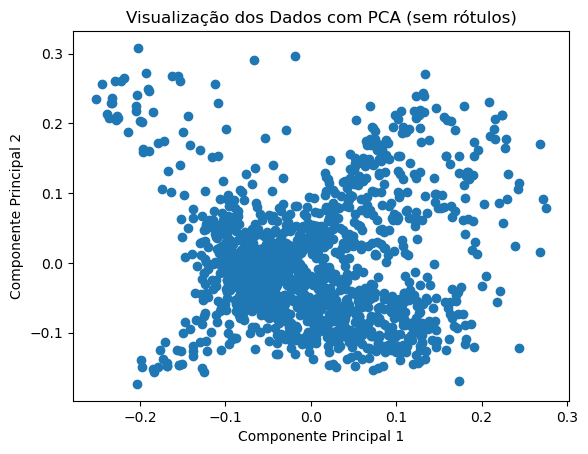

In [14]:
plt.figure()
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualização dos Dados com PCA (sem rótulos)')
plt.show()

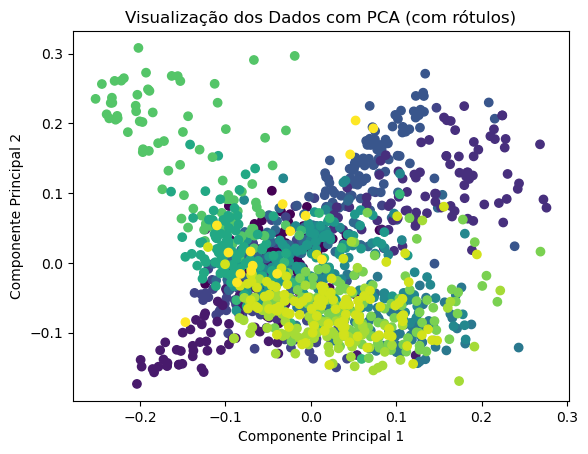

In [15]:
colors = plt.cm.viridis(df['category_id'] / df['category_id'].max())
plt.figure()
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=colors)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualização dos Dados com PCA (com rótulos)')
plt.show()

In [16]:
from sklearn.feature_selection import chi2

def obter_termos_cor_categoria(features, labels, tfidf, N=3):
    chi2_stat, _ = chi2(features, labels)
    top_term_indices = chi2_stat.argsort()[-N:]
    top_terms = [tfidf.get_feature_names_out()[i] for i in top_term_indices]
    return top_terms

top_terms_by_category = {}

for Category, category_id in sorted(category_to_id.items()):
    top_terms_by_category[Category] = obter_termos_cor_categoria(features, labels == category_id, tfidf, N)

## Train-test split

In [17]:
# x = coleção de texto e y = Alvo ou os rótulos que queremos prever

In [18]:
X = df['cleaned_website_text']
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [19]:
y_train.value_counts()

Category
Education                          82
Travel                             81
Business/Corporate                 76
Streaming Services                 75
Games                              66
News                               66
Computers and Technology           66
E-Commerce                         66
Sports                             65
Food                               64
Photography                        62
Health and Fitness                 62
Social Networking and Messaging    57
Law and Government                 56
Forums                             14
Adult                              10
Name: count, dtype: int64

In [20]:
y_test.value_counts()

Category
Sports                             35
E-Commerce                         35
Games                              32
Education                          32
Business/Corporate                 32
Photography                        30
Streaming Services                 29
News                               28
Food                               28
Law and Government                 27
Travel                             26
Health and Fitness                 26
Computers and Technology           25
Social Networking and Messaging    23
Adult                               6
Forums                              2
Name: count, dtype: int64

# Definição dos modelos usados

In [21]:
models = [
    DecisionTreeClassifier(),
    LogisticRegression(),
    SGDClassifier(loss='log_loss')
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df

,model_name,fold_idx,accuracy
0,DecisionTreeClassifier,0,0.581227
1,DecisionTreeClassifier,1,0.649819
2,DecisionTreeClassifier,2,0.624549
3,DecisionTreeClassifier,3,0.584838
4,DecisionTreeClassifier,4,0.561594
5,LogisticRegression,0,0.826715
6,LogisticRegression,1,0.906137
7,LogisticRegression,2,0.913357
8,LogisticRegression,3,0.898917
9,LogisticRegression,4,0.869565


*resultados obtidos

In [22]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
DecisionTreeClassifier,0.600405,0.035851
LogisticRegression,0.882938,0.035562
SGDClassifier,0.886559,0.029069


## Plot da Curva de Aprendizado

In [23]:
def plot_learning_curve(model, X_train, y_train, X_test, y_test):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy')
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training accuracy', marker='o')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
    plt.plot(train_sizes, test_mean, label='Test accuracy', marker='o')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)
    plt.xlabel('Número de amostras de treinamento')
    plt.ylabel('Acurácia')
    plt.legend(loc='best')
    plt.grid()
    plt.title('Curva de Aprendizado')
    plt.show()

In [24]:
def plot_learning_curve_mse(model, X_train, y_train, X_test, y_test):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X_train,
        y=y_train,
        cv=5,
        scoring="neg_mean_squared_error",
    )

    train_mean = -train_scores.mean(axis=1)
    test_mean = -test_scores.mean(axis=1)

    plt.subplots(figsize=(10,8))
    plt.plot(train_sizes, train_mean, label="train")
    plt.plot(train_sizes, test_mean, label="validation")

    plt.title('Curva de Aprendizado')
    plt.xlabel('Número de amostras de treinamento')
    plt.ylabel("RMSE")
    plt.legend(loc="best")
    plt.show()

## Regressão Logistica

In [25]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df.index, test_size=0.3, 
                                                               random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('Train accuracy:', accuracy_score(y_train, y_train_pred))
print('Test accuracy:', accuracy_score(y_test, y_test_pred))

Train accuracy: 0.9721074380165289
Test accuracy: 0.9158653846153846


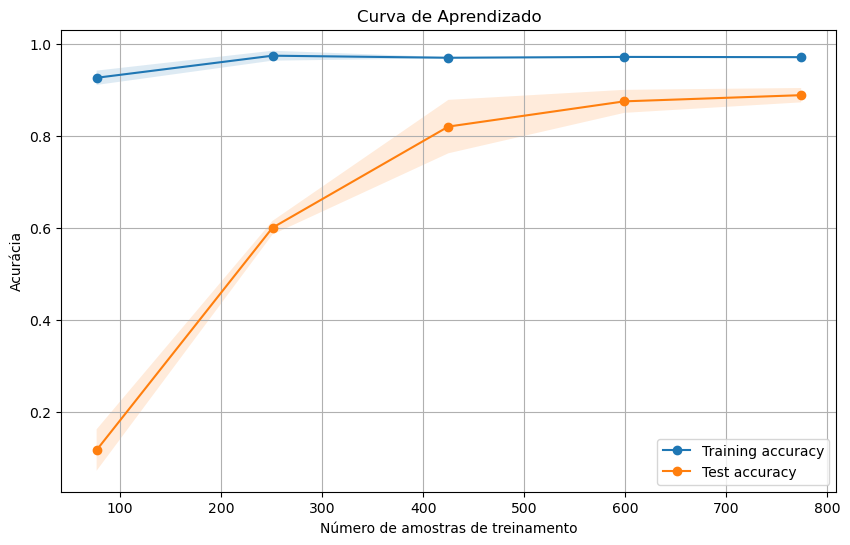

In [26]:
plot_learning_curve(model, X_train, y_train, X_test, y_test)

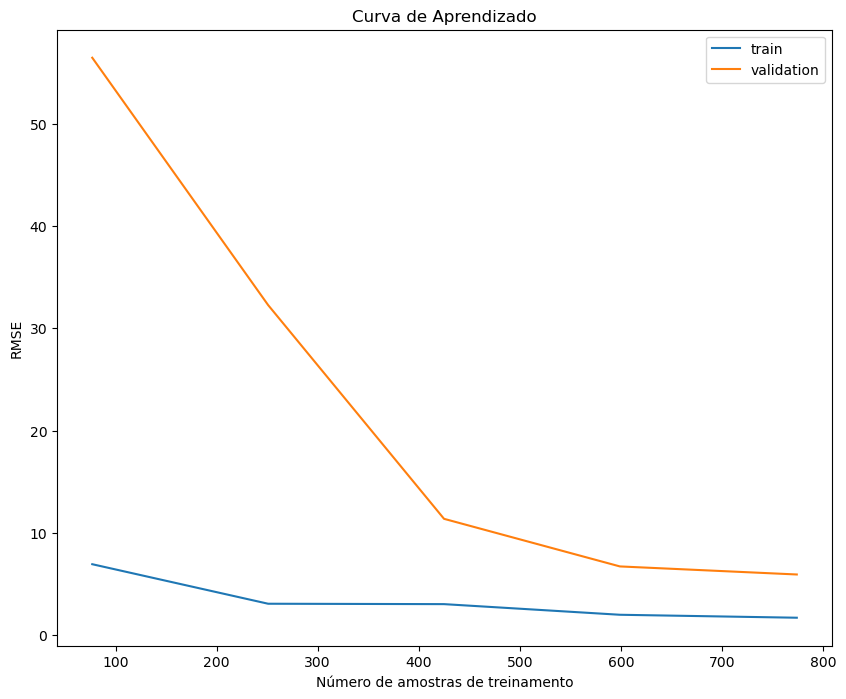

In [27]:
plot_learning_curve_mse(model, X_train, y_train, X_test, y_test)

### Resultados da classificação

In [28]:
print('\t\t\t\tMetricas de classificação\n')
print(metrics.classification_report(y_test,y_test_pred,labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],target_names= df['Category'].unique()))

				Metricas de classificação

                                 precision    recall  f1-score   support

                         Travel       0.92      0.92      0.92        26
Social Networking and Messaging       0.92      0.96      0.94        23
                           News       0.86      0.86      0.86        28
             Streaming Services       1.00      0.97      0.98        29
                         Sports       1.00      0.91      0.96        35
                    Photography       1.00      0.97      0.98        30
             Law and Government       0.96      1.00      0.98        27
             Health and Fitness       0.89      0.92      0.91        26
                          Games       0.89      0.97      0.93        32
                     E-Commerce       0.92      0.94      0.93        35
                         Forums       0.00      0.00      0.00         2
                           Food       0.96      0.89      0.93        28
                   

C:\Users\josec\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\josec\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\josec\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Matriz de confusão

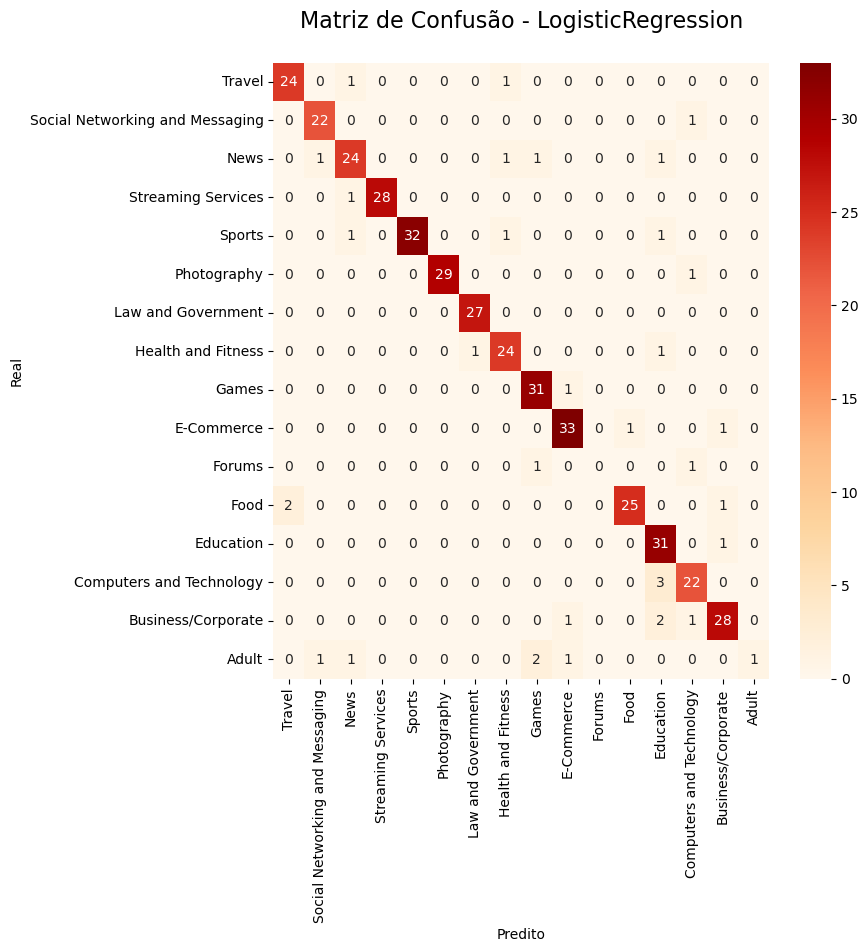

In [29]:
conf_mat = confusion_matrix(y_test, y_test_pred,labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="OrRd", fmt='d',
            xticklabels=category_id_df.Category.values, 
            yticklabels=category_id_df.Category.values)
plt.ylabel('Real')
plt.xlabel('Predito')
plt.title("Matriz de Confusão - LogisticRegression\n", size=16);

### Hyperameter Tunning

In [30]:
# Hiperparâmetros a serem ajustados
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': [100, 200, 300]
}

# Crie um modelo de Logistic Regression
lr = LogisticRegression()

# Usando GridSearchCV para encontrar os melhores hiperparâmetros
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Melhores hiperparâmetros encontrados
best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)


Melhores hiperparâmetros: {'C': 10.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [31]:
model = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', max_iter=100)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('Train accuracy:', accuracy_score(y_train, y_train_pred))
print('Test accuracy:', accuracy_score(y_test, y_test_pred))

Train accuracy: 0.9741735537190083
Test accuracy: 0.9206730769230769


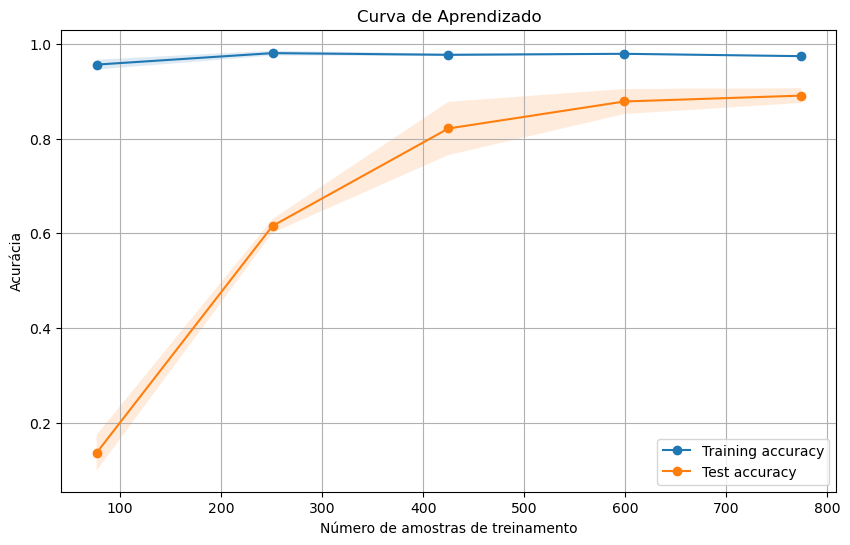

In [32]:
plot_learning_curve(model, X_train, y_train, X_test, y_test)

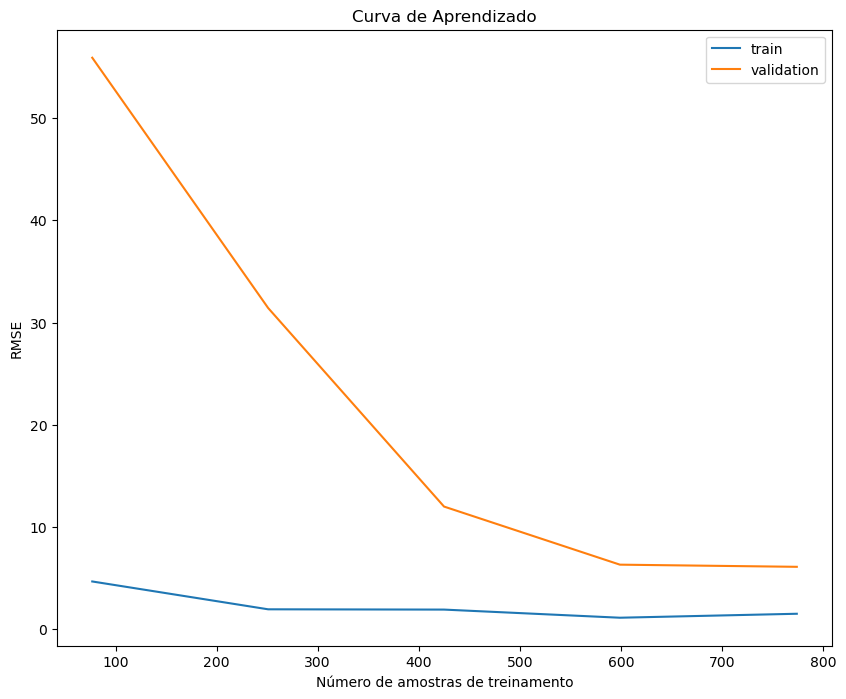

In [33]:
plot_learning_curve_mse(model, X_train, y_train, X_test, y_test)

In [34]:
print('\t\t\t\tMetricas de classificação\n')
print(metrics.classification_report(y_test,y_test_pred,labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],target_names= df['Category'].unique()))

				Metricas de classificação

                                 precision    recall  f1-score   support

                         Travel       0.92      0.92      0.92        26
Social Networking and Messaging       0.92      0.96      0.94        23
                           News       0.86      0.86      0.86        28
             Streaming Services       1.00      0.97      0.98        29
                         Sports       1.00      0.91      0.96        35
                    Photography       1.00      0.97      0.98        30
             Law and Government       0.96      1.00      0.98        27
             Health and Fitness       0.89      0.92      0.91        26
                          Games       0.89      0.97      0.93        32
                     E-Commerce       0.92      0.97      0.94        35
                         Forums       0.00      0.00      0.00         2
                           Food       0.96      0.93      0.95        28
                   

C:\Users\josec\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\josec\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\josec\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


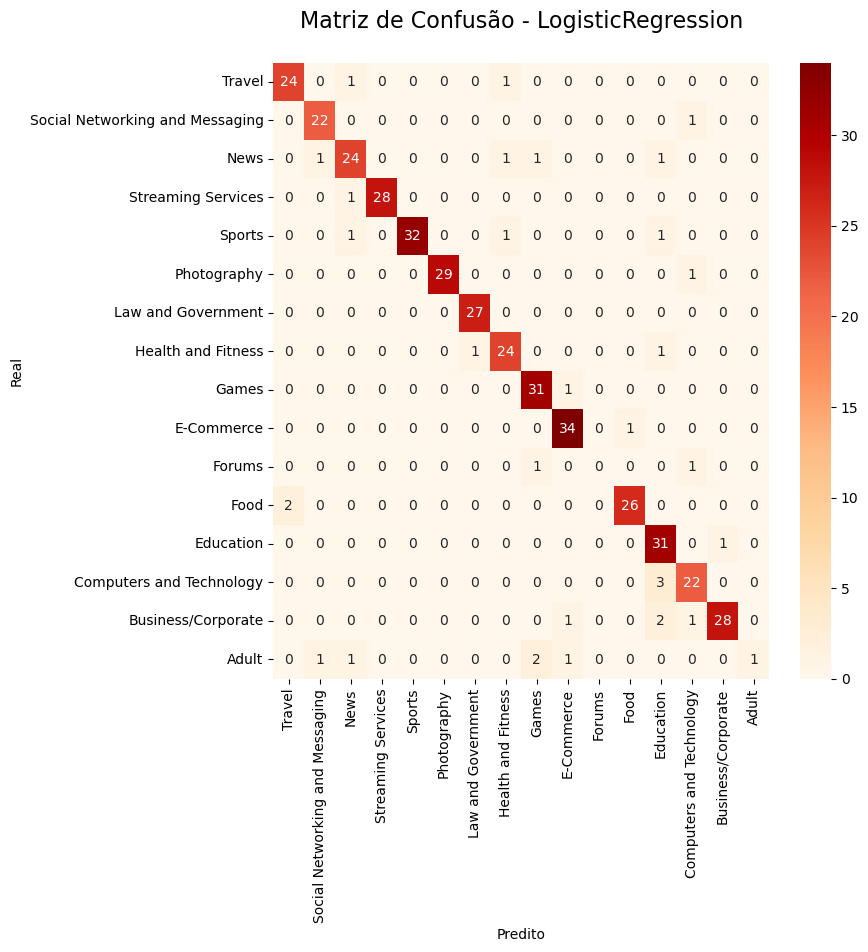

In [35]:
conf_mat = confusion_matrix(y_test, y_test_pred,labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="OrRd", fmt='d',
            xticklabels=category_id_df.Category.values, 
            yticklabels=category_id_df.Category.values)
plt.ylabel('Real')
plt.xlabel('Predito')
plt.title("Matriz de Confusão - LogisticRegression\n", size=16);

### Decision Tree

In [36]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df.index, test_size=0.3, 
                                                               random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('Train accuracy:', accuracy_score(y_train, y_train_pred))
print('Test accuracy:', accuracy_score(y_test, y_test_pred))

Train accuracy: 0.9989669421487604
Test accuracy: 0.6057692307692307


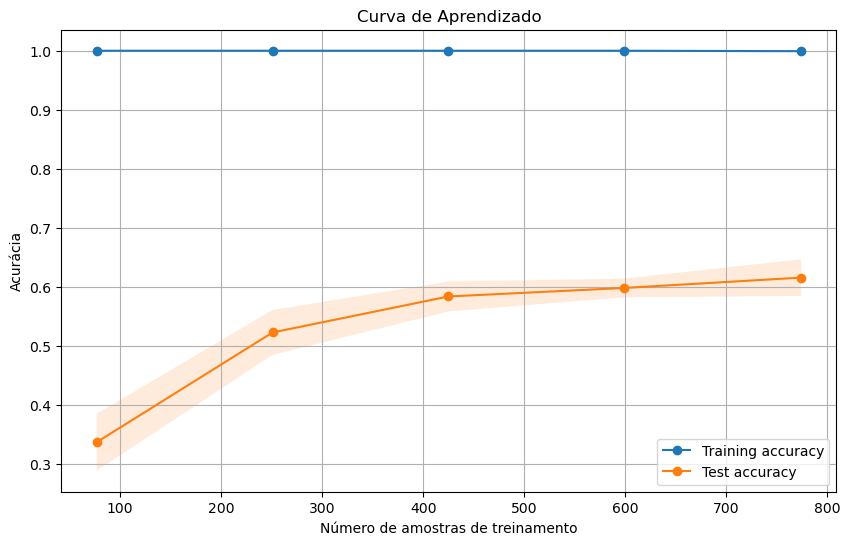

In [37]:
plot_learning_curve(model, X_train, y_train, X_test, y_test)

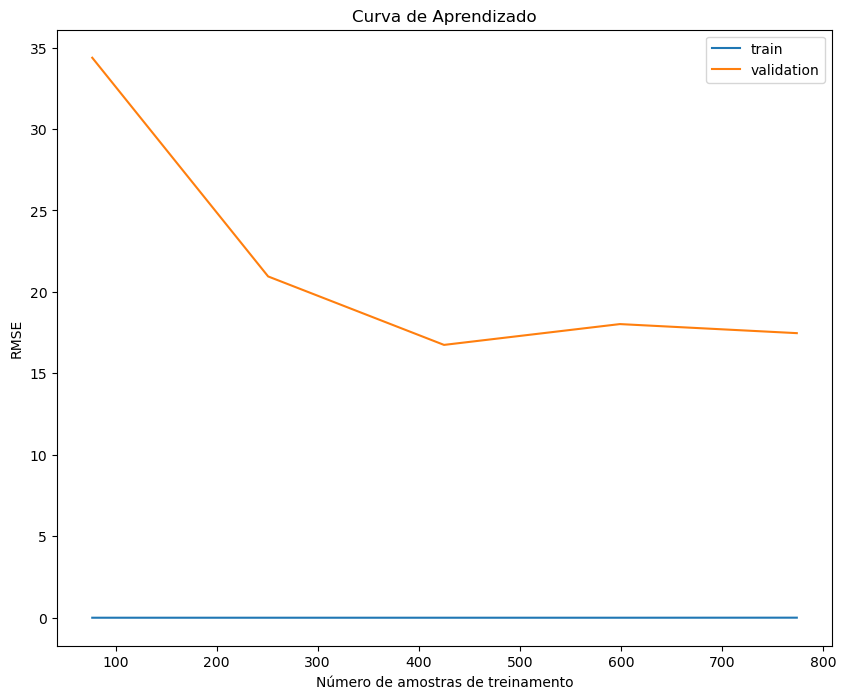

In [38]:
plot_learning_curve_mse(model, X_train, y_train, X_test, y_test)

In [39]:
print('\t\t\t\tMetricas de classificação\n')
print(metrics.classification_report(y_test,y_test_pred,labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],target_names= df['Category'].unique()))

				Metricas de classificação

                                 precision    recall  f1-score   support

                         Travel       0.55      0.69      0.61        26
Social Networking and Messaging       0.83      0.83      0.83        23
                           News       0.64      0.50      0.56        28
             Streaming Services       0.53      0.59      0.56        29
                         Sports       0.83      0.69      0.75        35
                    Photography       0.93      0.87      0.90        30
             Law and Government       0.55      0.67      0.60        27
             Health and Fitness       0.47      0.54      0.50        26
                          Games       0.59      0.69      0.64        32
                     E-Commerce       0.82      0.66      0.73        35
                         Forums       0.00      0.00      0.00         2
                           Food       0.69      0.64      0.67        28
                   

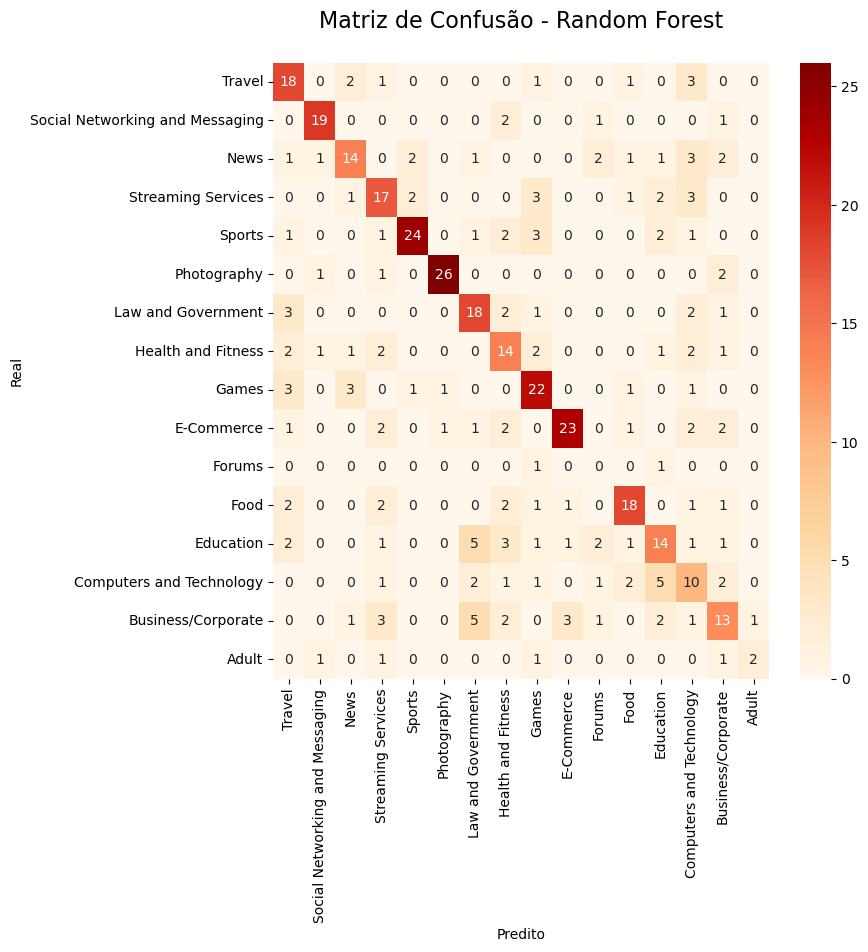

In [40]:
conf_mat = confusion_matrix(y_test, y_test_pred,labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="OrRd", fmt='d',
            xticklabels=category_id_df.Category.values, 
            yticklabels=category_id_df.Category.values)
plt.ylabel('Real')
plt.xlabel('Predito')
plt.title("Matriz de Confusão - Random Forest\n", size=16);

## Hyperameter Tunning

In [41]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2', None],
}

rf = DecisionTreeClassifier()

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)

C:\Users\josec\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
450 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\josec\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\josec\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\josec\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\josec\anaconda3\Lib\site-packa

Melhores hiperparâmetros: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [42]:
model = DecisionTreeClassifier(max_depth= 50, 
                               min_samples_leaf= 7, min_samples_split= 2
                              )


model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('Train accuracy:', accuracy_score(y_train, y_train_pred))
print('Test accuracy:', accuracy_score(y_test, y_test_pred))

Train accuracy: 0.7892561983471075
Test accuracy: 0.625


In [43]:
print('\t\t\t\tMetricas de classificação\n')
print(metrics.classification_report(y_test,y_test_pred,labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],target_names= df['Category'].unique()))

				Metricas de classificação

                                 precision    recall  f1-score   support

                         Travel       0.53      0.77      0.62        26
Social Networking and Messaging       0.62      0.78      0.69        23
                           News       0.78      0.50      0.61        28
             Streaming Services       0.70      0.66      0.68        29
                         Sports       0.78      0.71      0.75        35
                    Photography       0.93      0.90      0.92        30
             Law and Government       0.54      0.78      0.64        27
             Health and Fitness       0.44      0.54      0.48        26
                          Games       0.68      0.72      0.70        32
                     E-Commerce       0.78      0.71      0.75        35
                         Forums       0.00      0.00      0.00         2
                           Food       0.83      0.54      0.65        28
                   

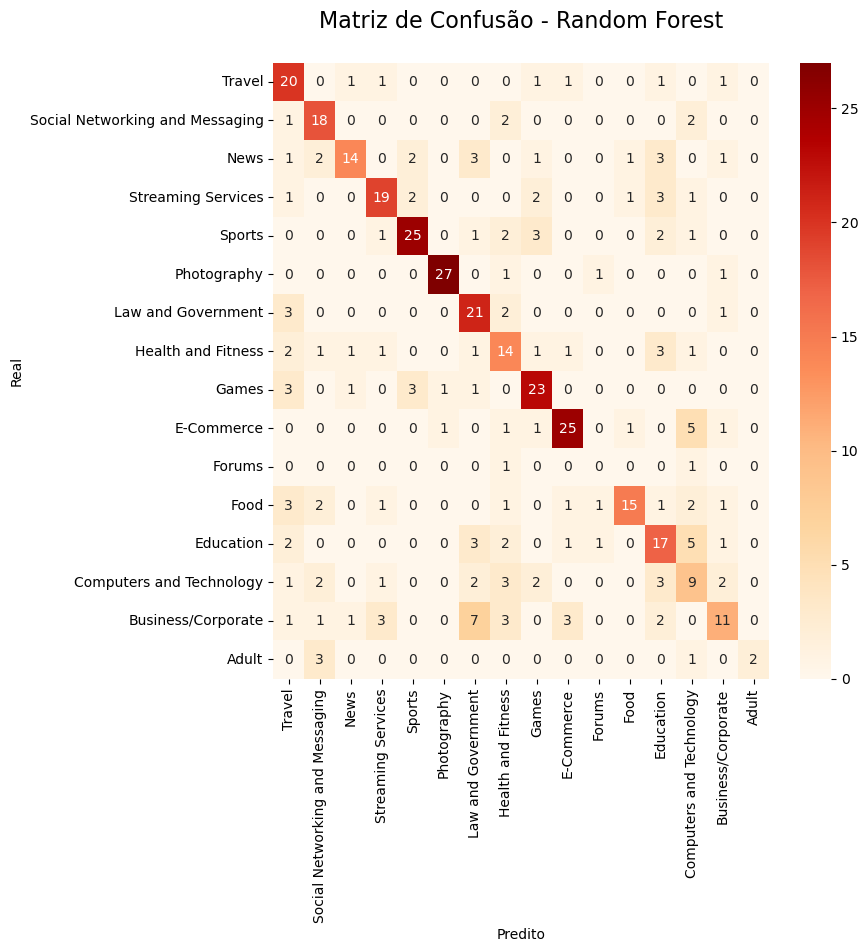

In [44]:
conf_mat = confusion_matrix(y_test, y_test_pred, labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="OrRd", fmt='d',
            xticklabels=category_id_df.Category.values, 
            yticklabels=category_id_df.Category.values)
plt.ylabel('Real')
plt.xlabel('Predito')
plt.title("Matriz de Confusão - Random Forest\n", size=16);

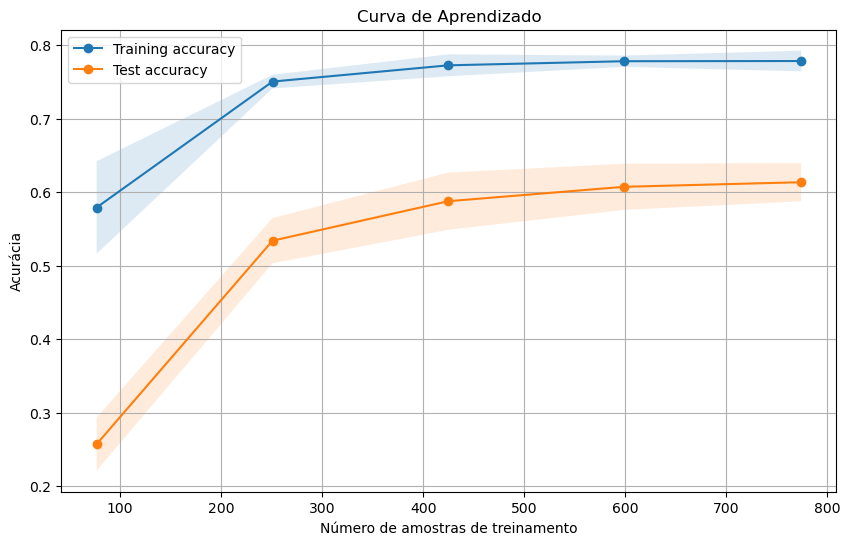

In [45]:
plot_learning_curve(model, X_train, y_train, X_test, y_test)

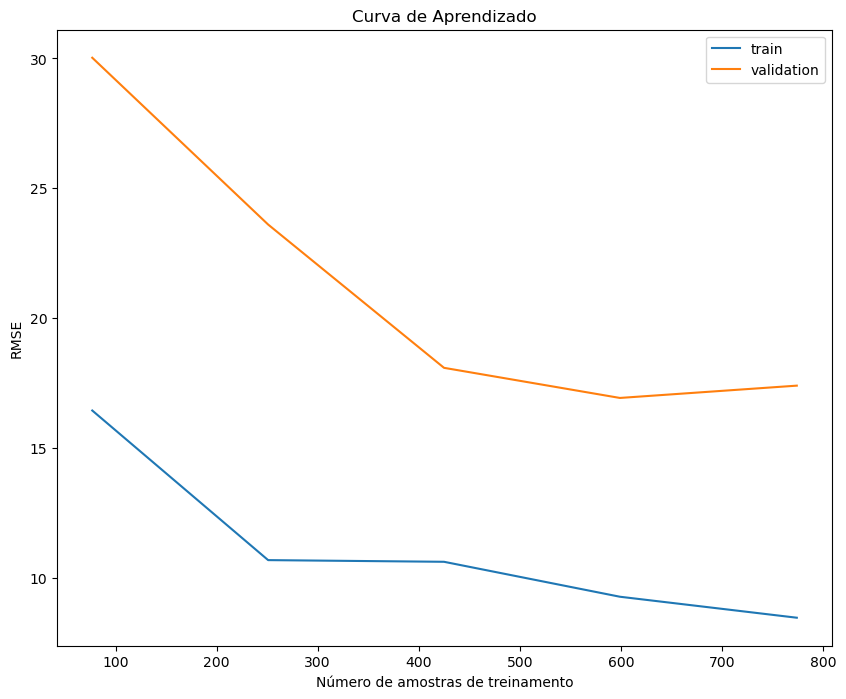

In [46]:
plot_learning_curve_mse(model, X_train, y_train, X_test, y_test)

### Regressão Logistica com SGD

In [47]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df.index, test_size=0.3, 
                                                               random_state=42)
model = SGDClassifier(loss='log_loss')
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('Train accuracy:', accuracy_score(y_train, y_train_pred))
print('Test accuracy:', accuracy_score(y_test, y_test_pred))

Train accuracy: 0.9979338842975206
Test accuracy: 0.9038461538461539


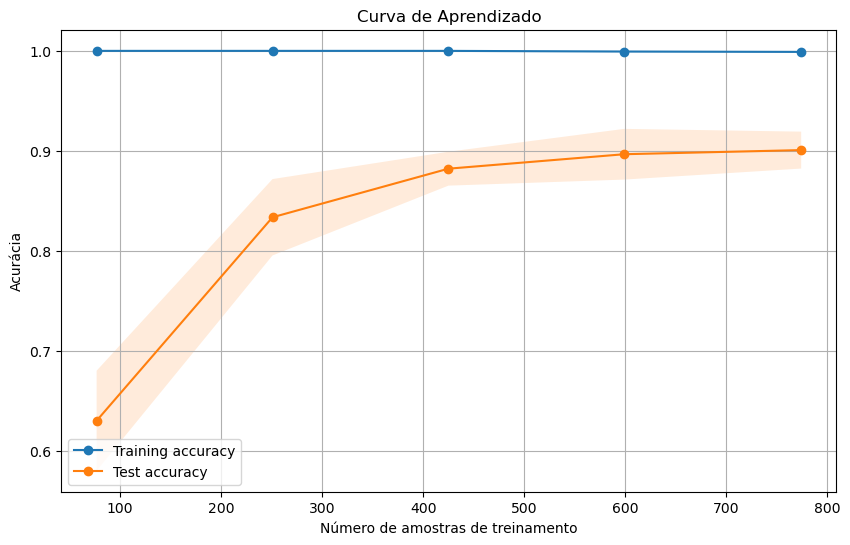

In [48]:
plot_learning_curve(model, X_train, y_train, X_test, y_test)

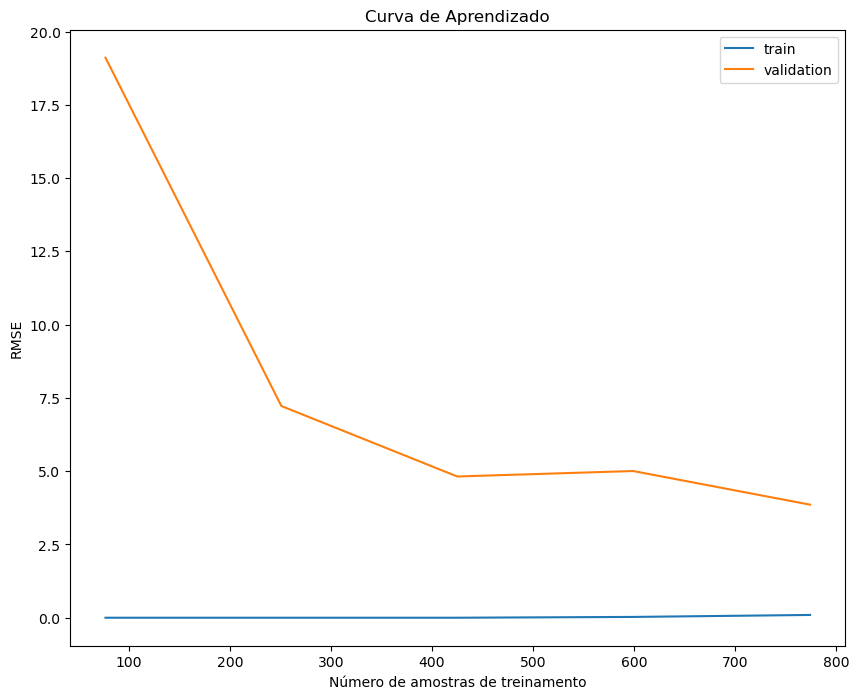

In [49]:
plot_learning_curve_mse(model, X_train, y_train, X_test, y_test)

In [50]:
print('\t\t\t\tMetricas de classificação\n')
print(metrics.classification_report(y_test,y_test_pred,labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],target_names= df['Category'].unique()))

				Metricas de classificação

                                 precision    recall  f1-score   support

                         Travel       0.92      0.92      0.92        26
Social Networking and Messaging       0.95      0.78      0.86        23
                           News       0.86      0.86      0.86        28
             Streaming Services       1.00      0.90      0.95        29
                         Sports       0.97      0.89      0.93        35
                    Photography       1.00      0.93      0.97        30
             Law and Government       0.93      1.00      0.96        27
             Health and Fitness       0.86      0.96      0.91        26
                          Games       0.91      0.97      0.94        32
                     E-Commerce       0.91      0.91      0.91        35
                         Forums       0.00      0.00      0.00         2
                           Food       0.93      0.89      0.91        28
                   

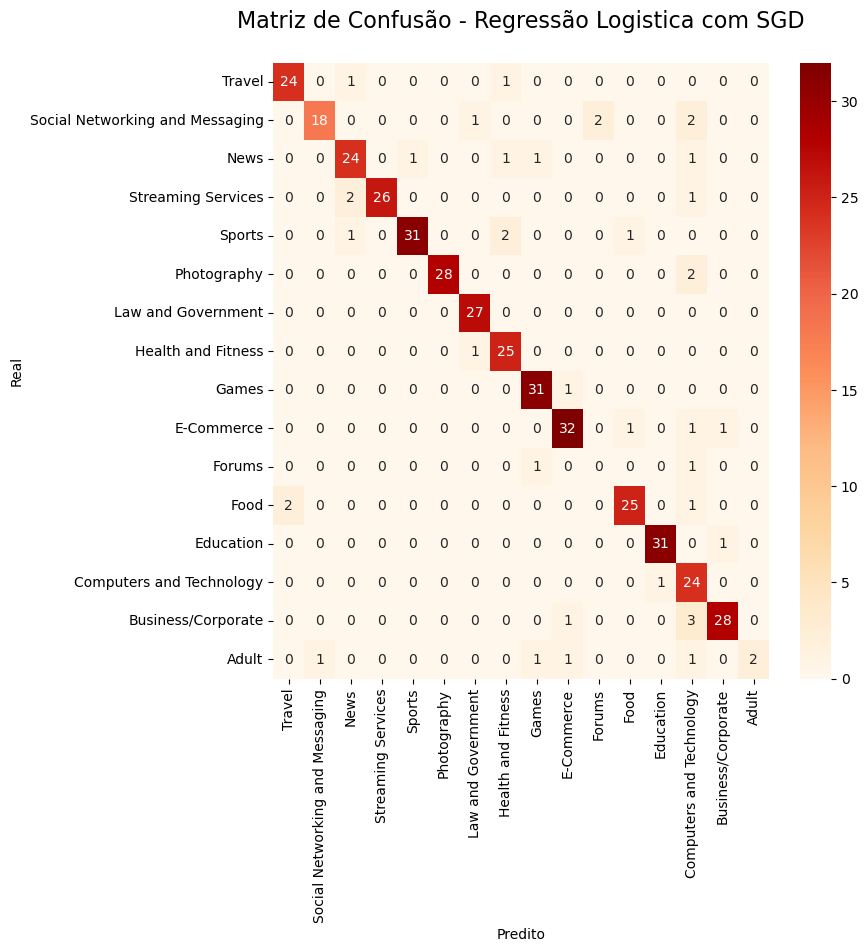

In [51]:
conf_mat = confusion_matrix(y_test, y_test_pred,labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="OrRd", fmt='d',
            xticklabels=category_id_df.Category.values, 
            yticklabels=category_id_df.Category.values)
plt.ylabel('Real')
plt.xlabel('Predito')
plt.title("Matriz de Confusão - Regressão Logistica com SGD\n", size=16);

## Hyperameter Tunning

In [52]:
# Hiperparâmetros a serem ajustados
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.01, 0.1, 1.0]
}

sgd = SGDClassifier(loss='log_loss', random_state=42)

grid_search = GridSearchCV(sgd, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)  # Substitua X_train e y_train pelos seus dados

best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)

Melhores hiperparâmetros: {'alpha': 0.0001, 'eta0': 1.0, 'learning_rate': 'adaptive'}


In [53]:
model = SGDClassifier(loss='log_loss', penalty='l2', alpha= 0.001, eta0= 1.0, 
                      learning_rate= 'adaptive', max_iter=200)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('Train accuracy:', accuracy_score(y_train, y_train_pred))
print('Test accuracy:', accuracy_score(y_test, y_test_pred))

Train accuracy: 0.9710743801652892
Test accuracy: 0.9158653846153846


In [54]:
print('\t\t\t\tMetricas de classificação\n')
print(metrics.classification_report(y_test,y_test_pred,labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],target_names= df['Category'].unique()))

				Metricas de classificação

                                 precision    recall  f1-score   support

                         Travel       0.92      0.92      0.92        26
Social Networking and Messaging       0.92      0.96      0.94        23
                           News       0.86      0.86      0.86        28
             Streaming Services       1.00      0.97      0.98        29
                         Sports       1.00      0.91      0.96        35
                    Photography       1.00      0.97      0.98        30
             Law and Government       0.96      1.00      0.98        27
             Health and Fitness       0.89      0.92      0.91        26
                          Games       0.89      0.97      0.93        32
                     E-Commerce       0.92      0.94      0.93        35
                         Forums       0.00      0.00      0.00         2
                           Food       0.96      0.89      0.93        28
                   

C:\Users\josec\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\josec\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\josec\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


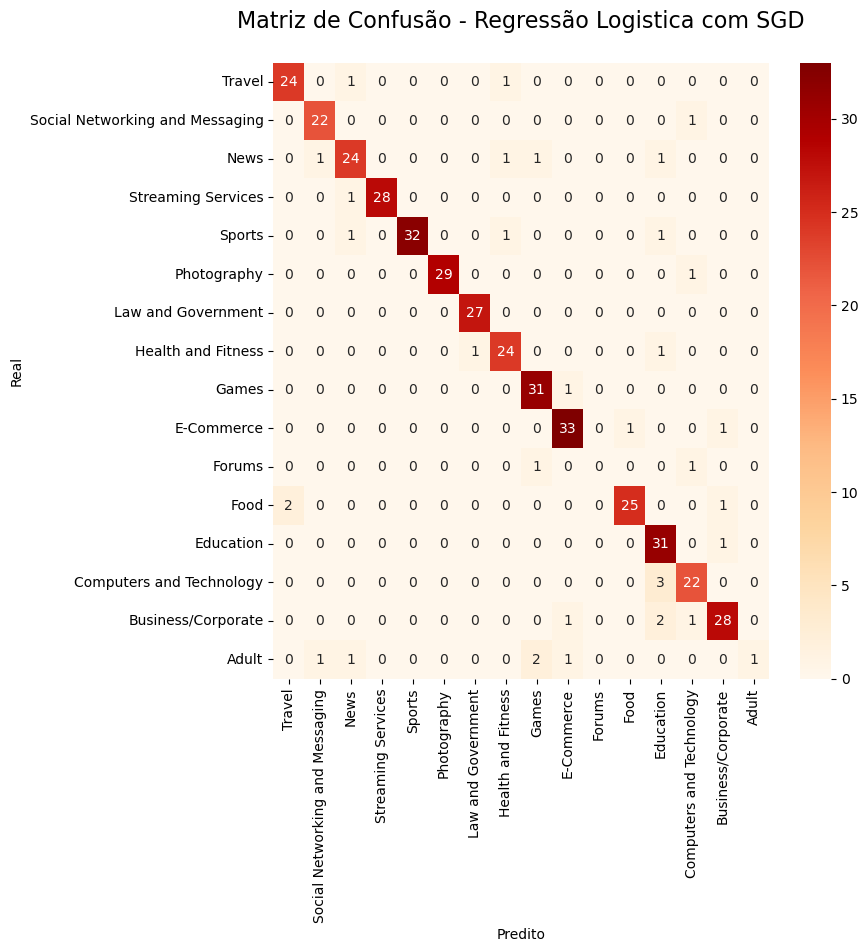

In [55]:
conf_mat = confusion_matrix(y_test, y_test_pred,labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="OrRd", fmt='d',
            xticklabels=category_id_df.Category.values, 
            yticklabels=category_id_df.Category.values)
plt.ylabel('Real')
plt.xlabel('Predito')
plt.title("Matriz de Confusão - Regressão Logistica com SGD\n", size=16);

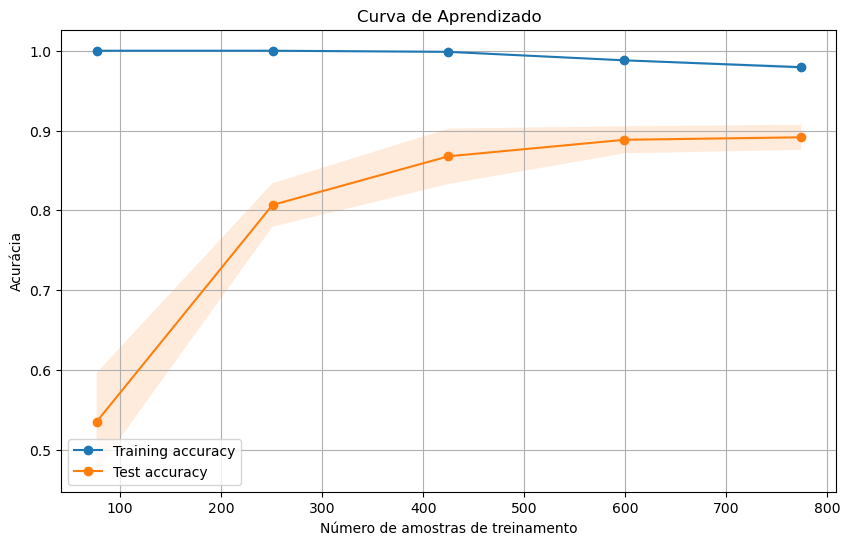

In [56]:
plot_learning_curve(model, X_train, y_train, X_test, y_test)

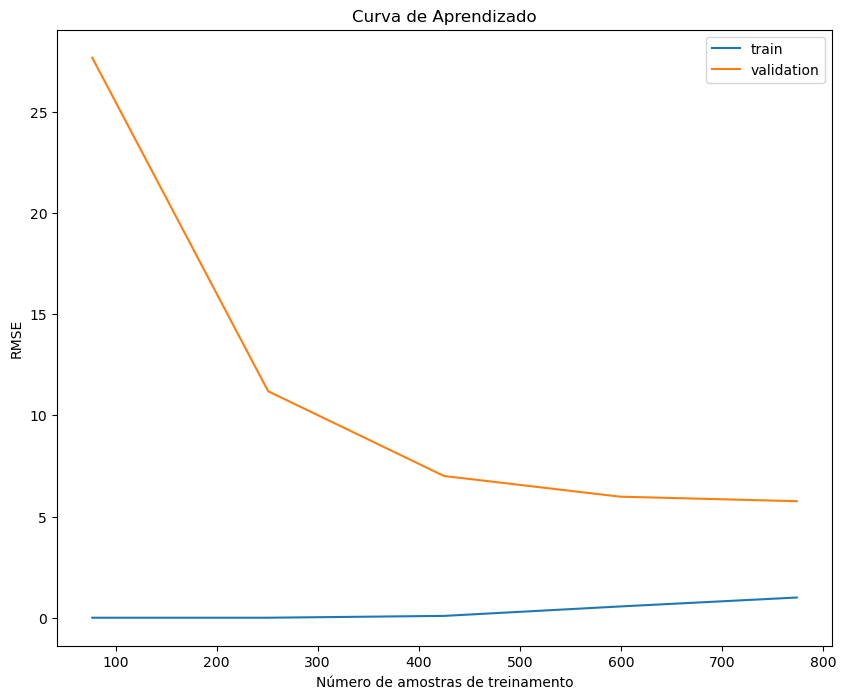

In [57]:
plot_learning_curve_mse(model, X_train, y_train, X_test, y_test)

##  Análise de Consistência

#### Arvore de Decisão

In [58]:
model = DecisionTreeClassifier(max_depth= 50, 
                               min_samples_leaf= 7, min_samples_split= 2
                              )

train_sizes = [0.3, 0.6, 0.9]

entries = []
for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=1-train_size, random_state=42)

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    entries.append((train_size, train_accuracy, test_accuracy))

# Criando um DataFrame com os resultados
df_results = pd.DataFrame(entries, columns=['train_size', 'train_accuracy', 'test_accuracy'])
df_results

,train_size,train_accuracy,test_accuracy
0,0.3,0.744578,0.513932
1,0.6,0.784337,0.628159
2,0.9,0.793574,0.640288


#### Gradiente descendente

In [59]:
model = SGDClassifier(loss='log_loss', penalty='l2', alpha= 0.001, eta0= 1.0, 
                      learning_rate= 'adaptive', max_iter=200)

train_sizes = [0.3, 0.6, 0.9]

entries = []
for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=1-train_size, random_state=42)

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    entries.append((train_size, train_accuracy, test_accuracy))

df_results = pd.DataFrame(entries, columns=['train_size', 'train_accuracy', 'test_accuracy'])
df_results

,train_size,train_accuracy,test_accuracy
0,0.3,0.995181,0.854489
1,0.6,0.979518,0.913357
2,0.9,0.971084,0.920863
